In [1]:
using Revise
using PottsProductionScheduling

┌ Info: Precompiling PottsProductionScheduling [14e5a3a8-54b3-48e7-a2dc-d9c858be7609]
└ @ Base loading.jl:1317
┌ Warning: Package PottsProductionScheduling does not have Flux in its dependencies:
│ - If you have PottsProductionScheduling checked out for development and have
│   added Flux as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with PottsProductionScheduling
└ Loading Flux into PottsProductionScheduling from project dependency, future warnings for PottsProductionScheduling are suppressed.


In [42]:
using Distributions, PyPlot

In [2]:
Nmachines = 5
Ngoods = 3
T = 20

20

In [3]:
env = randomEnvironment(20, Nmachines, Ngoods, 1.0, 1.0);

In [4]:
agent = Agent(rand(1:Ngoods, Nmachines, T), Ngoods);

In [5]:
 production_cost(env, agent)

20-element Vector{Float64}:
 -4.9692806008160115
 -3.4199231268415597
  5.306278223060171
  4.367431290024181
 -2.7545388836818674
 -4.508778419794566
 -5.096649694300414
 -3.084658278870629
 -4.006114549128111
  0.7531353124120832
  3.781738987801596
  3.628963355707242
 -4.469986341586294
 -2.1742485935744904
  0.7454206211290713
  8.977688563705755
 -0.11871376579543891
  4.292437798342069
 -6.677567090196678
 -3.94828891569712

In [6]:
switching_cost(env, agent)

19-element Vector{Float64}:
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0

In [14]:
demand = PoissonDemand(rand(collect(0:1), Ngoods, T))

PoissonDemand([0 1 … 0 0; 0 0 … 0 0; 0 1 … 1 0], [0 0 … 0 0; 0 0 … 0 0; 0 3 … 1 0])

In [19]:
inventory_cost(env, agent, demand)

20-element Vector{Float64}:
   0.0
   0.2688803611865079
  -0.7151735491188103
   1.5077245106280763
   1.1058000165002515
 -19.65909478896788
  10.179894721435787
  34.12398609570179
  41.00729383472171
  45.71693036966164
  -7.304595092823348
 -20.520423675456218
 -39.19061095006424
   0.44423279458374765
  29.27119972096401
 -89.58798993690957
  36.914809515953365
 -27.660802155189366
   6.990136741501361
  65.07386536994869

In [21]:
total_cost(env, agent, demand)

5149.590409796157

In [22]:
compute_inventory(env, agent, demand)

3×20 Matrix{Float64}:
 0.0  1.0  4.0  6.0  5.0  9.0  13.0  …  21.0  24.0  23.0  24.0  26.0  26.0
 0.0  3.0  3.0  2.0  4.0  5.0   5.0     15.0  16.0  16.0  18.0  18.0  18.0
 0.0  0.0  1.0  3.0  5.0  5.0   4.0     13.0  14.0  15.0  15.0  17.0  22.0

In [27]:
compute_expected_inventory(env, agent, demand)

3×20 Matrix{Float64}:
 0.0  0.367879  3.36788  4.36822  …  15.3686  16.3686  18.3686  18.3686
 0.0  3.0       3.0      2.02334     16.0234  18.0234  18.0234  18.0234
 0.0  0.367879  1.42922  3.43123     17.4335  18.4335  20.4335  25.4335

In [36]:
PottsProductionScheduling.annealing!(env, agent, demand, 30)

Agent(20, 5, 3, [3 1 … 1 1; 2 1 … 3 2; … ; 2 1 … 2 3; 3 2 … 3 1], [0 0 … 0 0; 0 1 … 1 0; 1 0 … 0 1]

[1 1 … 1 0; 0 0 … 0 1; 0 0 … 0 0]

[0 0 … 0 1; 0 0 … 0 0; 1 1 … 1 0]

...

[1 0 … 1 0; 0 1 … 0 1; 0 0 … 0 0]

[1 0 … 0 0; 0 0 … 1 0; 0 1 … 0 1]

[1 0 … 0 1; 0 1 … 0 0; 0 0 … 1 0])

In [71]:
β = exp.(0.005 .* collect(1:1000))

1000-element Vector{Float64}:
   1.005012520859401
   1.010050167084168
   1.015113064615719
   1.0202013400267558
   1.0253151205244289
   1.030454533953517
   1.0356197087996233
   1.0408107741923882
   1.046027859908717
   1.0512710963760241
   1.0565406146754943
   1.0618365465453596
   1.0671590243841926
   ⋮
 140.4708508514462
 141.17496392147686
 141.88260637295846
 142.5937958969891
 143.3085502733439
 144.02688737091955
 144.748825148181
 145.47438165361004
 146.2035750261572
 146.9364234956948
 147.67294538347278
 148.4131591025766

In [72]:
a, c =PottsProductionScheduling.annealing_schedule!(env, agent, demand, β)

(Agent(20, 5, 3, [2 2 … 2 1; 3 1 … 2 1; … ; 3 3 … 3 2; 3 2 … 1 3], [0 0 … 0 0; 1 0 … 0 0; 0 1 … 1 1]

[0 1 … 0 0; 1 0 … 0 1; 0 0 … 1 0]

[0 0 … 0 0; 0 0 … 1 0; 1 1 … 0 1]

...

[1 0 … 1 1; 0 0 … 0 0; 0 1 … 0 0]

[0 0 … 0 1; 1 1 … 0 0; 0 0 … 1 0]

[1 1 … 0 0; 0 0 … 1 0; 0 0 … 0 1]), [5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445, 5072.854979721445  …  5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727, 5029.456911527727])

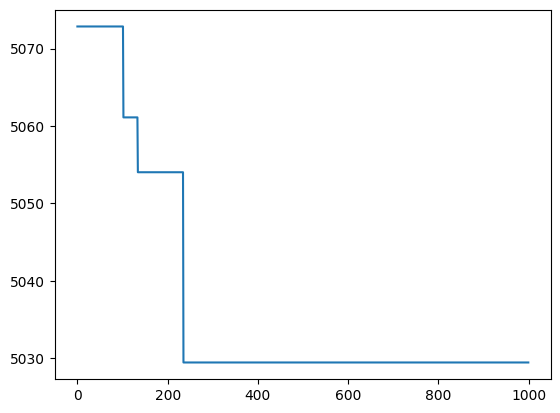

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe5769d4a30>

In [73]:
plot(c)

In [74]:
c

1000-element Vector{Float64}:
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
 5072.854979721445
    ⋮
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727
 5029.456911527727